In [1]:
import numpy as np
import scipy as sci
from sim import *
pi = np.pi

In [2]:
# Parameters
mu = 3968600 * 1000**3 # gravitational const (m^3/s^2)
R_e = 6.378e6 # radius of the earth (m)
h_sat = 700 * 1000 # Altitude of s/c (m)
r0 = R_e + h_sat # Init radius
v0 = 0
theta0 = 0
omega0 = np.sqrt(mu/r0**3)

Period = 2*pi*np.sqrt(r0**3/mu)
tspan = [0, 5*Period]
teval = np.linspace(tspan[0], tspan[1], 200)

X0 = np.array([r0, v0, theta0, omega0])

In [3]:
def prop_orbit(X0, tspan, U_func, num_eval = 200):

    int_func = lambda t, X: sim_func(X, U_func, mu, )
    teval = np.linspace(tspan[0], tspan[1], num_eval)
    sol = sci.integrate.solve_ivp(int_func, tspan, X0, t_eval= teval)

    return [sol.y, sol.t]

def prop_orbit_linear(X0, tspan, U_func, num_eval = 200):

    int_func = lambda t, X: sim_func_linear(X, U_func, mu, r0)
    teval = np.linspace(tspan[0], tspan[1], num_eval)
    sol = sci.integrate.solve_ivp(int_func, tspan, X0, t_eval= teval)

    return [sol.y, sol.t]

In [4]:
X_diff = np.array([100, 0, 0, 0])
X0_obj = X0 + X_diff

X_prop, t_prop = prop_orbit(X0_obj, tspan, contr_func)
X_ref, t_ref = prop_orbit(X0, tspan, contr_func)

X_diff_lin, t_lin = prop_orbit_linear(X_diff, tspan, contr_func)
X_lin = (X_ref + X_diff_lin)

In [5]:
Xref_cart = polar_to_cart_inertial(X_ref)
Xprop_cart = polar_to_cart_inertial(X_prop)
Xlin_cart = polar_to_cart_inertial(X_lin)

In [6]:
t_diff, X_diff = orbit_diff(Xref_cart, t_ref, Xlin_cart, t_lin)


In [7]:
Xdiff_ric = np.zeros(X_diff.shape)
for i in range(Xdiff_ric.shape[1]):
    rot_mat = RI_rot_from_XY(Xref_cart[:,i])
    diff_ric = rot_mat @ X_diff[:,i]
    Xdiff_ric[:,i] = diff_ric

(np.float64(-20630.623879992076),
 np.float64(19697.75935513246),
 np.float64(-20708.70016483521),
 np.float64(20375.39077902219))

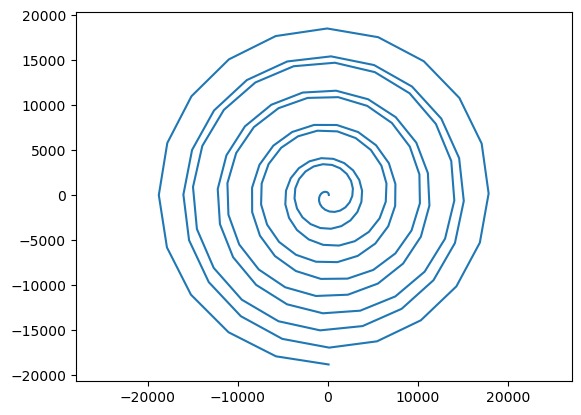

In [8]:
plt.plot(Xdiff_ric[0], Xdiff_ric[1])
plt.axis("equal")